In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neural_net import NeuralNetwork
from operations import *
from sklearn.utils import shuffle

In [2]:
def load_dataset(csv_path, target_feature):
    dataset = pd.read_csv(csv_path)
    t = np.expand_dims(dataset[target_feature].to_numpy().astype(np.float64), axis=1)
    X = dataset.drop([target_feature], axis=1).to_numpy()
    return X, t

In [3]:
X, y = load_dataset("./data/banknote_authentication.csv", "target")

# Split the data by K-fold with K=5
k_fold = 5
#np.random.seed(486)
trainXs = X
trainYs = y
trainXs, trainYs = shuffle(trainXs, trainYs)
size = X.shape[0] // k_fold
Train = []
Valid = []

for k in range(k_fold):
    X_train = np.concatenate((trainXs[0:k*size], trainXs[(k+1)*size:]))
    y_train = np.concatenate((trainYs[0:k*size], trainYs[(k+1)*size:]))
    X_valid = trainXs[k*size:(k+1)*size]
    y_valid = trainYs[k*size:(k+1)*size]

    Train.append((X_train, y_train))
    Valid.append((X_valid, y_valid))

In [4]:
print(X.shape)
print(Valid[2][0].shape)
print(Valid[2][1].shape)

(1372, 4)
(274, 4)
(274, 1)


In [5]:
# count how many 1s in each validation set
for i in range(k_fold):
    print(np.sum(Valid[i][1]))

114.0
131.0
114.0
130.0
120.0


In [6]:
losses = []
accuracies = []
epochs = 1000

for k in range(k_fold):
    X_train = Train[k][0]
    y_train = Train[k][1]
    X_valid = Valid[k][0]
    y_valid = Valid[k][1]
    loss = []
    accs = []

    n_features = X_train.shape[1]
    net = NeuralNetwork(n_features, [32,32,16,1], [ReLU(), ReLU(), ReLU(), Sigmoid()], CrossEntropy(), learning_rate=0.01)

    # Train the network, use loss as output
    for epoch in range (epochs):
        trained_W, epoch_losses = net.train(X_train, y_train, 1)
        loss.append(epoch_losses[-1])
        # Forward the validation set to get the output
        Y_predict = net.forward_pass(X_valid)[1][-1]
        # Evaluate the network on the test set, use accuracy as output
        accs.append(net.evaluate(X_valid, y_valid, accuracy))

    losses.append(loss)
    accuracies.append(accs)

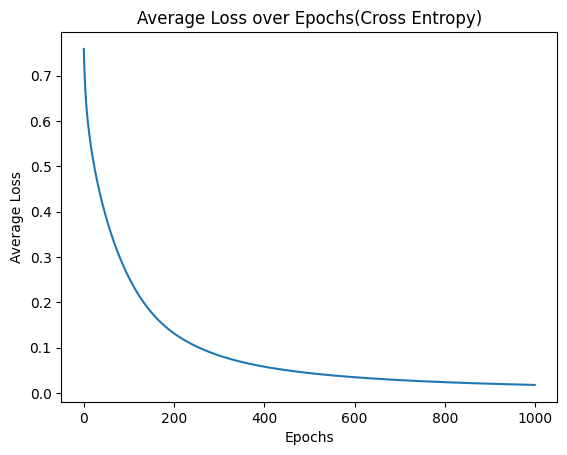

In [7]:
# Plot the average loss over epochs for all folds
avg_loss = np.mean(losses, axis=0)
plt.plot(range(epochs), avg_loss)
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Average Loss over Epochs(Cross Entropy)")
plt.show()

In [8]:
# Print the accuracy for each fold
for i in range(k_fold):
    print("Accuracy on fold {} is {}".format(i, accuracies[i][-1])) 

Accuracy on fold 0 is 1.0
Accuracy on fold 1 is 0.9963503649635036
Accuracy on fold 2 is 1.0
Accuracy on fold 3 is 1.0
Accuracy on fold 4 is 1.0


In [9]:
# Calculate the average accuracy and standard deviation
for i in range(k_fold):
    mean_acc = np.mean(accuracies[i])
    std_acc = np.std(accuracies[i])
    print("Average accuracy on fold {} is {}".format(i, mean_acc))
    print("Standard deviation on fold {} is {}".format(i, std_acc))

Average accuracy on fold 0 is 0.9763759124087592
Standard deviation on fold 0 is 0.06687514509269057
Average accuracy on fold 1 is 0.9708394160583942
Standard deviation on fold 1 is 0.05730739400310522
Average accuracy on fold 2 is 0.975565693430657
Standard deviation on fold 2 is 0.05427315006076437
Average accuracy on fold 3 is 0.9695839416058395
Standard deviation on fold 3 is 0.06443982771071016
Average accuracy on fold 4 is 0.9808029197080294
Standard deviation on fold 4 is 0.06069995926805981


In [23]:
# Calculate the total average accuracy and standard deviation
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
print("Average accuracy on all folds is {}".format(mean_acc))
print("Standard deviation on all folds is {}".format(std_acc))

Average accuracy on all folds is 0.9746335766423357
Standard deviation on all folds is 0.061025951110449284
